# The Jupyter notebook cheat sheet
This document will be available to you during tests and exams

## Table of Contents

[Numeric](#Numeric)

[Basic plotting functions](#Basic-plotting-functions)

[Symbolic manipulation](#Symbolic-manipulation)

[Equation solving](#Equation-solving)

[Matrix math](#Matrix-math)

In [1]:
import tbcontrol
tbcontrol.expectversion('0.1.2')

## Numeric 

In [2]:
import numpy
import scipy

In [3]:
a = numpy.array([1, 2, 3])

In [4]:
t = numpy.linspace(0, 10)

## Basic plotting functions

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

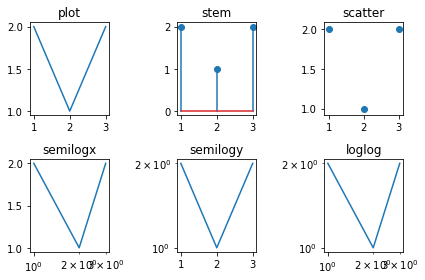

In [6]:
plotfuncs = [plt.plot, 
             plt.stem,
             plt.scatter, 
             plt.semilogx, 
             plt.semilogy, 
             plt.loglog]

for i, func in enumerate(plotfuncs, 1):
    plt.subplot(2, 3, i)
    func([1, 2, 3], [2, 1, 2])
    plt.title(func.__name__)
plt.tight_layout()

## Symbolic manipulation

### Imports

In [7]:
import sympy
sympy.init_printing()

Symbol definitions

In [8]:
s = sympy.Symbol('s')  # A single symbol
tau, K_c = sympy.symbols('tau K_c', positive=True) # we can use real=True or complex=True for other kinds of variables

Example controller and system

In [9]:
Gc = K_c*((tau*s + 1) / (tau*s))
GvGpGm = 5 / ((10*s + 1)**2)

### Working with rational functions and polynomials

We often want nice rational functions, but sympy doesn't make expressions rational by default

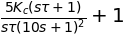

In [10]:
chareq = GvGpGm*Gc + 1
chareq

The `cancel` function forces this to be a fraction. `collect` collects terms.

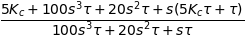

In [11]:
chareq = chareq.cancel().collect(s)
chareq

In some cases we can factor equations:

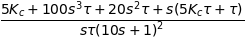

In [12]:
chareq.factor(s)

Obtain the numerator and denominator:

In [13]:
sympy.numer(chareq), sympy.denom(chareq)

If you want them both, you can use

In [14]:
chareq.as_numer_denom()

Convert to polynomial in s

In [15]:
numer = sympy.poly(sympy.numer(chareq), s)

Once we have a polynomial, it is easy to obtain coefficients:

In [16]:
numer.all_coeffs()

Calculate the Routh Array

In [17]:
from tbcontrol.symbolic import routh

In [18]:
routh(numer)

⎡         100⋅τ           5⋅K_c⋅τ + τ⎤
⎢                                    ⎥
⎢         20⋅τ               5⋅K_c   ⎥
⎢                                    ⎥
⎢-25⋅K_c + τ⋅(5⋅K_c + 1)       0     ⎥
⎢                                    ⎥
⎣         5⋅K_c                0     ⎦

To get a function which can be used numerically, use `lambdify`:

In [19]:
f = sympy.lambdify((K_c, tau), K_c + tau)

In [20]:
f(1, 2)

### Functions useful for discrete systems

In [21]:
z, q = sympy.symbols('z, q')

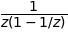

In [22]:
Gz = z**-1/(1 - z**-1)
Gz

Write in terms of positive powers of $z$:

In [23]:
Gz.cancel()

Write in terms of negative powers of $z$:

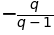

In [24]:
Gz.subs({z: q**-1}).cancel()

Inversion of the $z$ transform

In [25]:
from tbcontrol.symbolic import sampledvalues

In [26]:
sampledvalues(Gz, z, 10)

## Equation solving

### Symbolic

In [27]:
x, y, z, a = sympy.symbols('x, y, z, a')
residuals = [x + y - 2, y + z - a, x + y + z]
unknowns = [x, y, z]
sympy.solve(residuals, unknowns)

### Numeric sympy

In [28]:
residuals = [2*x**2 - 2*y**2, sympy.sin(x) + sympy.log(y)]
unknowns = [x, y]
sympy.nsolve(residuals, unknowns, [1, 3])

⎡-2.21910714891375⎤
⎢                 ⎥
⎣2.21910714891375 ⎦

### Numeric

In [29]:
import scipy.optimize

In [30]:
def residuals(unknowns):
    x, y = unknowns
    return [2*x**2 - 2*y**2, numpy.sin(x) + numpy.log(y)]

In [31]:
starting_point = [1, 3]

In [32]:
residuals(starting_point)

In [33]:
scipy.optimize.fsolve(residuals, starting_point)

array([-2.21910715,  2.21910715])

## Matrix math 

### Symbolic

In [34]:
G11, G12, G21, G22 = sympy.symbols('G11, G12, G21, G22')

Creation

In [35]:
G = sympy.Matrix([[G11, G12], [G21, G22]])
G

⎡G₁₁  G₁₂⎤
⎢        ⎥
⎣G₂₁  G₂₂⎦

Determinant, inverse, transpose

In [36]:
G.det(), G.inv(), G.T

⎛                   ⎡       G₂₂               -G₁₂       ⎤            ⎞
⎜                   ⎢─────────────────  ─────────────────⎥            ⎟
⎜                   ⎢G₁₁⋅G₂₂ - G₁₂⋅G₂₁  G₁₁⋅G₂₂ - G₁₂⋅G₂₁⎥  ⎡G₁₁  G₂₁⎤⎟
⎜G₁₁⋅G₂₂ - G₁₂⋅G₂₁, ⎢                                    ⎥, ⎢        ⎥⎟
⎜                   ⎢      -G₂₁                G₁₁       ⎥  ⎣G₁₂  G₂₂⎦⎟
⎜                   ⎢─────────────────  ─────────────────⎥            ⎟
⎝                   ⎣G₁₁⋅G₂₂ - G₁₂⋅G₂₁  G₁₁⋅G₂₂ - G₁₂⋅G₂₁⎦            ⎠

Math operations: Multiplication, addition, elementwise multiplication:

In [37]:
G*G, G+G, G.multiply_elementwise(G)

⎛⎡    2                               ⎤                  ⎡   2     2⎤⎞
⎜⎢ G₁₁  + G₁₂⋅G₂₁    G₁₁⋅G₁₂ + G₁₂⋅G₂₂⎥  ⎡2⋅G₁₁  2⋅G₁₂⎤  ⎢G₁₁   G₁₂ ⎥⎟
⎜⎢                                    ⎥, ⎢            ⎥, ⎢          ⎥⎟
⎜⎢                                 2  ⎥  ⎣2⋅G₂₁  2⋅G₂₂⎦  ⎢   2     2⎥⎟
⎝⎣G₁₁⋅G₂₁ + G₂₁⋅G₂₂   G₁₂⋅G₂₁ + G₂₂   ⎦                  ⎣G₂₁   G₂₂ ⎦⎠

### Numeric

Creation

In [38]:
G = numpy.matrix([[1, 2], [3, 4]])

Determinant, inverse, transpose

In [39]:
numpy.linalg.det(G), G.I, G.T

(-2.0000000000000004, matrix([[-2. ,  1. ],
         [ 1.5, -0.5]]), matrix([[1, 3],
         [2, 4]]))

Math operations: Multiplication, addition, elementwise multiplication:

In [40]:
G*G, G+G, G.A*G.A

(matrix([[ 7, 10],
         [15, 22]]), matrix([[2, 4],
         [6, 8]]), array([[ 1,  4],
        [ 9, 16]]))